# NER dataset preparation

In [1]:
# import libraries
import requests
import spacy
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data_from_github(url):
    """
    Loads data from a specified URL on GitHub.

    Arguments:
    - url (str): The URL pointing to the raw data on GitHub.

    Returns:
    - text (str): Content retrieved from the specified URL.
    """
    response = requests.get(url)
    if response.status_code == 200:
        text = response.text
        return text
    else:
        raise requests.HTTPError(f"Failed to retrieve content. Status code: {response.status_code}")

In [3]:
# download "back-bone" dataset

science_block_1 = r"https://raw.githubusercontent.com/zliucr/CrossNER/main/ner_data/science/train.txt"
science_block_2 = r"https://raw.githubusercontent.com/zliucr/CrossNER/main/ner_data/science/dev.txt"
science_block_3 = r"https://raw.githubusercontent.com/zliucr/CrossNER/main/ner_data/science/test.txt"

science_block_1_data = load_data_from_github(url=science_block_1)
science_block_2_data = load_data_from_github(url=science_block_2)
science_block_3_data = load_data_from_github(url=science_block_3)

In [4]:
# create Pandas dataframe from "back-bone" dataset
lines = []
lines.extend(science_block_1_data.strip().split('\n'))
lines.extend(science_block_2_data.strip().split('\n'))
lines.extend(science_block_3_data.strip().split('\n'))

sentences = []
words = []
labels = []

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        word, label = parts
        if word == '.':
            sentences.append({'Words': words, 'Labels': labels})
            words = []
            labels = []
        else:
            words.append(word)
            labels.append(label)

df_without_custom_data = pd.DataFrame(sentences)

print(f"Number of sentences in dataset without custom mountain's data: {len(df_without_custom_data)} instances.")

Number of sentences in dataset without custom mountain's data: 1173 instances.


In [5]:
# open lists with entities for creating labels
with open(r"Additional data\sentences.txt", "r") as file:
    list_of_sentences_raw = file.readlines()
list_of_sentences = [line for line in list_of_sentences_raw if "\n" !=line]

with open(r"Additional data\astronomical.txt", "r") as file:
    list_of_astronomical = file.readlines()
with open(r"Additional data\countries.txt", "r") as file:
    list_of_countries = file.readlines()
with open(r"Additional data\locations.txt", "r") as file:
    list_of_locations = file.readlines()
with open(r"Additional data\scientists.txt", "r") as file:
    list_of_scientists = file.readlines()
with open(r"Additional data\mountains.txt", "r") as file:
    list_of_mountains = file.readlines()

list_of_astronomical = list(set(list_of_astronomical))
list_of_countries = list(set(list_of_countries))
list_of_locations = list(set(list_of_locations))
list_of_scientists = list(set(list_of_scientists))
list_of_mountains = list(set(list_of_mountains))

In [6]:
def generate_word_positions(list_of_names):
    """
    Generates lists of beginning (B) and inside (I) positions of words from a list of names.

    Arguments:
    - list_of_names (list): A list of names, each name represented as a string.

    Returns:
    - B (list): List of first words (B) from each name in the input list.
    - I (list): List of inside words (I) from the names, excluding the first words.
    """
    B = []
    I = []
    for name in list_of_names:
        words = name.strip().split()
        B.append(words[0])
        if len(words) >= 2:
            I.extend(words[1:])
    return B, I

In [7]:
# sort entities by labels
B_astronomical, I_astronomical = generate_word_positions(list_of_astronomical)
B_countries, I_countries = generate_word_positions(list_of_countries)
B_locations, I_locations = generate_word_positions(list_of_locations)
B_scientists, I_scientists = generate_word_positions(list_of_scientists)
B_mountains, I_mountains = generate_word_positions(list_of_mountains)

In [8]:
# create list of all labels
All_labeled_words = []

All_labeled_words.extend(B_astronomical)
All_labeled_words.extend(B_countries)
All_labeled_words.extend(B_locations)
All_labeled_words.extend(B_scientists)
All_labeled_words.extend(B_mountains)

All_labeled_words.extend(I_astronomical)
All_labeled_words.extend(I_countries)
All_labeled_words.extend(I_locations)
All_labeled_words.extend(I_scientists)
All_labeled_words.extend(I_mountains)

In [9]:
# download Spacy and created text similar to "back-bone"
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')
generated_data = ""

for sentence in list_of_sentences:
    doc = nlp(sentence)
    words = [token.text for token in doc]
    words = words[:-1]
    for word in words:
        label = ""
        if word not in All_labeled_words:
            label = "O"
        else:
            if word in B_astronomical:
                label = "B-astronomicalobject"
            elif word in I_astronomical:
                label = "I-astronomicalobject"
            elif word in B_countries:
                label = "B-country"
            elif word in I_countries:
                label = "I-country"
            elif word in B_locations:
                label = "B-location"
            elif word in I_locations:
                label = "I-location"
            elif word in B_scientists:
                label = "B-scientist"
            elif word in I_scientists:
                label = "I-scientist"
            elif word in B_mountains:
                label = "B-mountain"
            elif word in I_mountains:
                label = "I-mountain"
        generated_data += f"{word}\t{label}\n"

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
# create Pandas dataframe from custom dataset
lines = []
lines.extend(generated_data.strip().split('\n'))

sentences = []
words = []
labels = []

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        word, label = parts
        if word == '.':
            sentences.append({'Words': words, 'Labels': labels})
            words = []
            labels = []
        else:
            words.append(word)
            labels.append(label)

df_custom_data = pd.DataFrame(sentences)

In [11]:
# custom dataset
df_custom_data.head()

,Words,Labels
0,"[Everest, ,, known, for, its, towering, height...","[B-mountain, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[The, Rocky, Weißkugel, stretch, across, multi...","[O, O, B-mountain, O, O, O, O, O, O, B-locatio..."
2,"[K2, ,, the, second, -, highest, peak, in, the...","[B-mountain, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[The, Andes, ,, the, longest, mountain, range,...","[O, B-mountain, O, O, O, O, O, O, B-astronomic..."
4,"[Mount, Kilimanjaro, ,, Africa, 's, tallest, p...","[O, B-mountain, O, B-location, O, O, O, O, O, ..."


In [12]:
# "back-bone" dataset
df_without_custom_data.head()

,Words,Labels
0,"[They, may, also, use, Adenosine, triphosphate...","[O, O, O, O, B-chemicalcompound, I-chemicalcom..."
1,"[August, Kopff, ,, a, colleague, of, Wolf, at,...","[B-scientist, I-scientist, O, O, O, O, B-scien..."
2,"[The, five, bodies, currently, called, planets...","[O, O, O, O, O, O, O, O, O, O, O, B-misc, O, O..."
3,"[Several, genes, known, to, be, affected, by, ...","[O, O, O, O, O, O, O, O, O, O, O, B-protein, O..."
4,"[Hall, also, parodied, the, song, as, Cell, Bl...","[B-person, O, O, O, O, O, B-misc, I-misc, I-mi..."


In [13]:
# choose small fraction of "back-bone" dataset
df_without_custom_data_frac = df_without_custom_data.sample(frac=0.2, random_state=42)

histogram that shows a distributions of sentences length in custom dataset and "back-bone" dataset

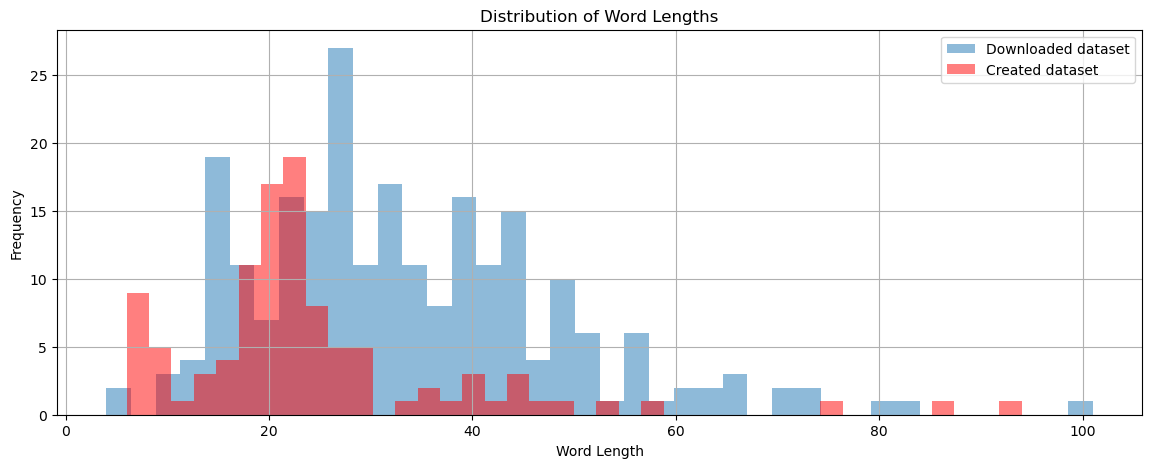

In [14]:
plt.figure(figsize=(14, 5))

# Histogram for df_without_custom_data
lengths = [len(word) for word in df_without_custom_data_frac["Words"]]
plt.hist(lengths, bins=40, alpha=0.5, label='Downloaded dataset')

# Histogram for df_custom_data
lengths = [len(word) for word in df_custom_data["Words"]]
plt.hist(lengths, bins=40, alpha=0.5, label='Created dataset', color="red")

plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.grid()
plt.legend();

In [15]:
#  concatenation of custom dataset and "back-bone" dataset
df_concatenated = pd.concat([df_custom_data, df_without_custom_data_frac], axis=0)
df_concatenated = df_concatenated.sample(frac=1, random_state=42)
df_concatenated = df_concatenated.reset_index(drop=True)

In [16]:
def return_text(x):
    """
    Joins a list of strings into a single string with spaces in between each element.

    Arguments:
    - x (list of str): List of strings to be concatenated.

    Returns:
    - text (str): A single string containing all elements of the list separated by spaces.
    """
    return ' '.join(x)

In [17]:
# cals lists into strings
df_concatenated["Words"] = df_concatenated["Words"].apply(return_text)
df_concatenated["Labels"] = df_concatenated["Labels"].apply(return_text)

In [18]:
# concatenated dataset
df_concatenated.head()

,Words,Labels
0,Pupin was a founding member of National Adviso...,B-scientist O O O O O B-organisation I-organis...
1,"Published in 1993 , it won the 1994 Nebula Awa...",O O O O O O O O B-award I-award I-award I-awar...
2,Auroras have been observed on both gas planets...,B-misc O O O O O B-misc I-misc O O O O O B-mis...
3,Observing wildlife behavior around Elbrus unco...,O O O O B-mountain O O O O O O O O O O O O O O...
4,"He studied at CMS College Kottayam , and gradu...",O O O B-university I-university I-university O...


In [19]:
# save dataset for NER task
df_concatenated.to_csv("Dataset.csv", index=False)